In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('C:\\Users\\Pc\\Downloads\\06_input_data.csv')

In [3]:
dataset.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [4]:


dataset.drop("Id", axis =1,inplace = True)


# Analysis of Target Variable:

In [5]:
from scipy import stats

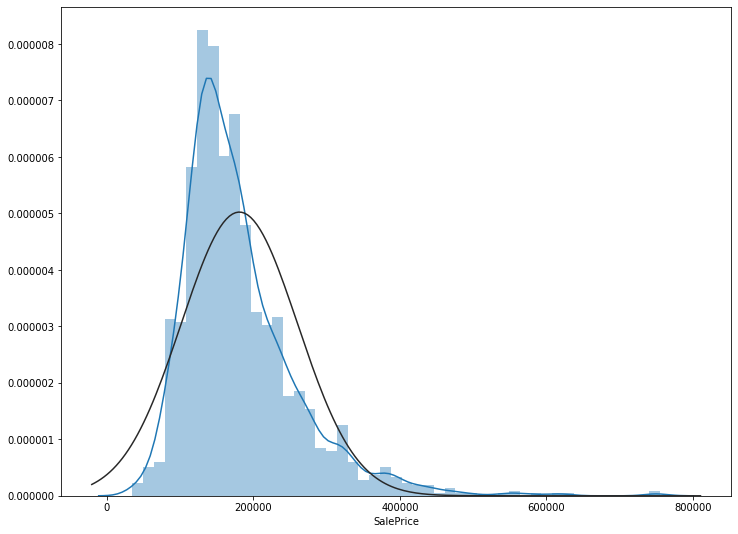

In [6]:
plt.subplots(figsize=(12,9))
sns.distplot(dataset['SalePrice'],fit=stats.norm)

In the above plot we can see that the sale price is positively skewed. Let's apply log transformation to make it more normal

In [7]:
dataset['SalePrice'] = np.log1p(dataset['SalePrice'])# log transformation of the target data

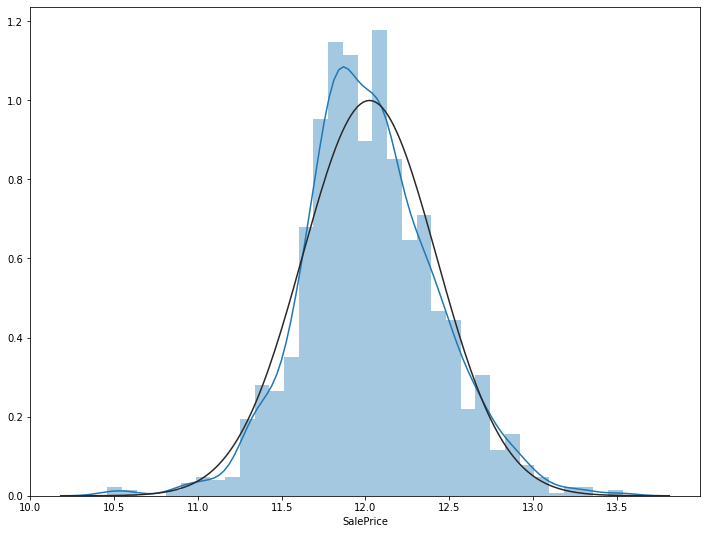

In [8]:
plt.subplots(figsize=(12,9))
sns.distplot(dataset['SalePrice'],fit= stats.norm)

# Exploration of numeric features:

In [9]:
datacol = dataset.select_dtypes(include=['integer','float']).columns


In [10]:
datacol

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

# To see the cooorelation between the target and feature

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


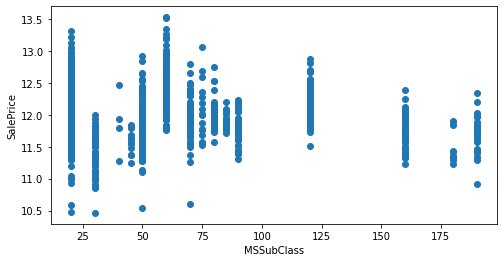

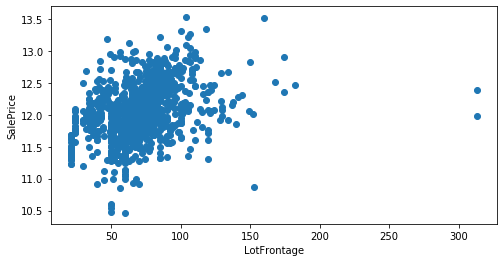

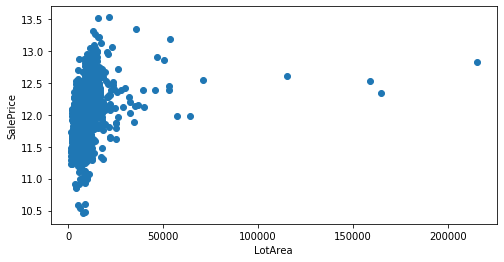

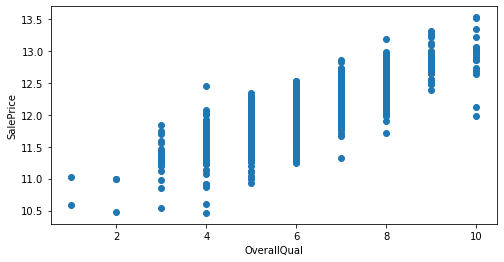

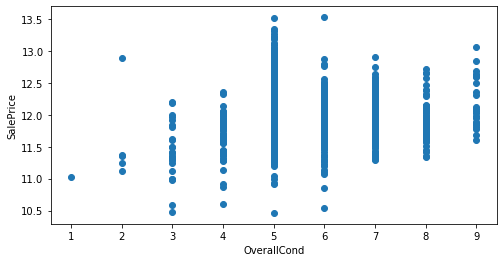

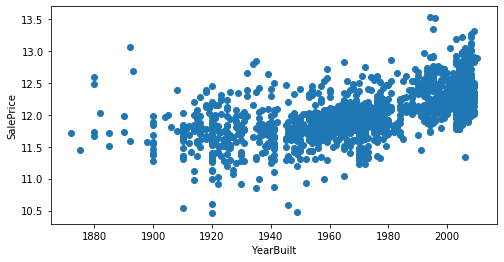

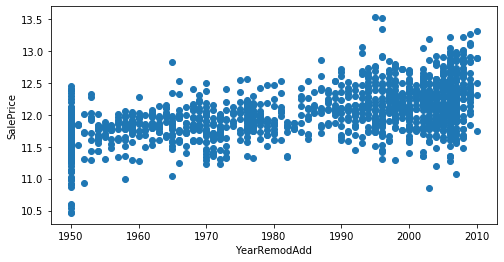

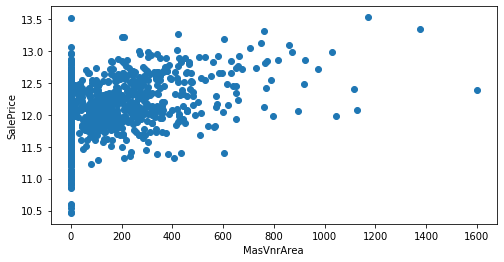

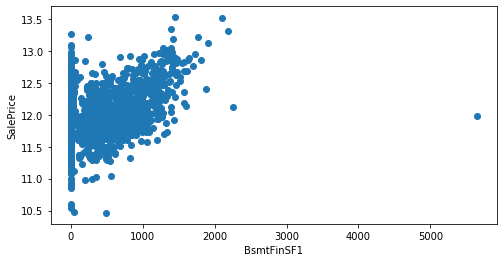

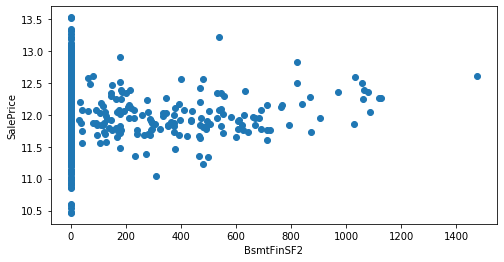

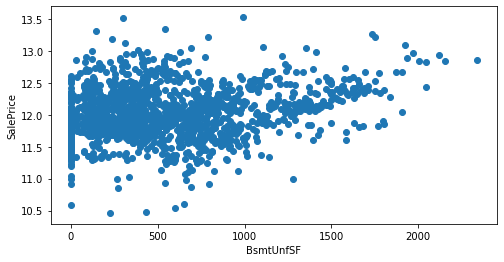

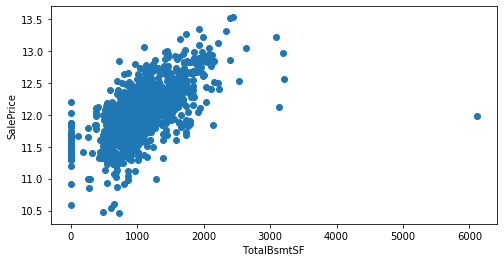

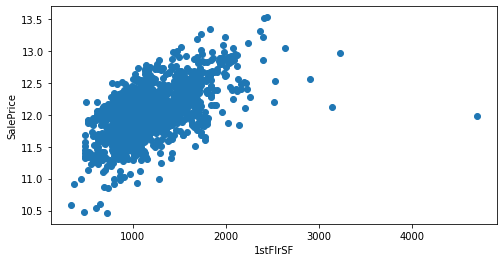

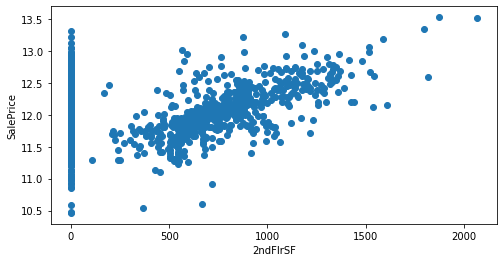

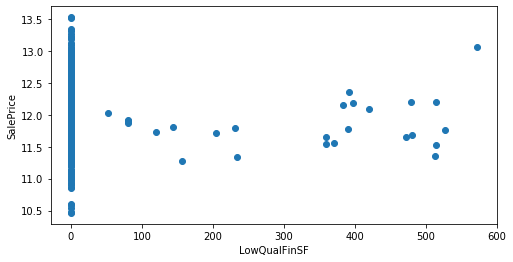

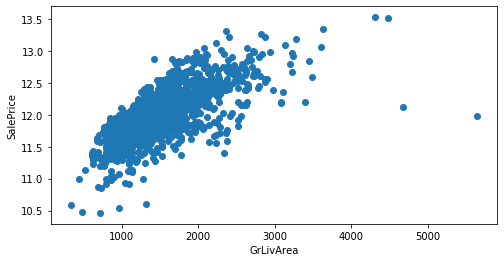

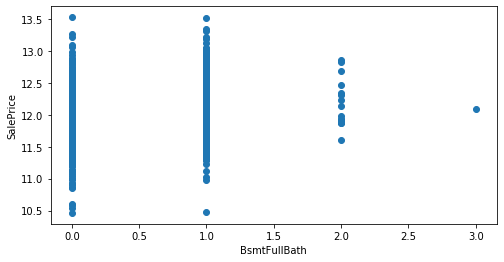

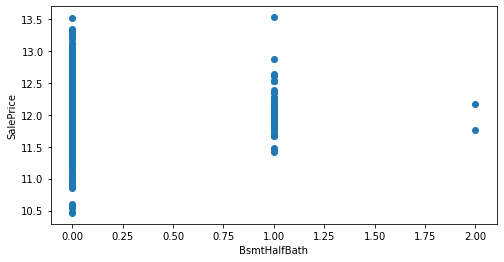

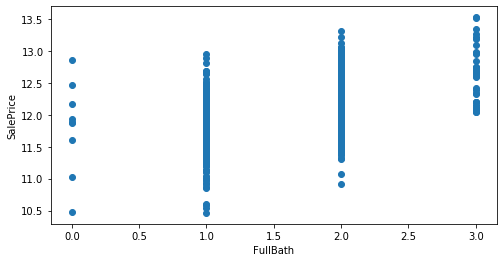

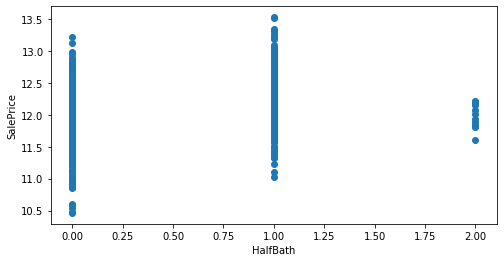

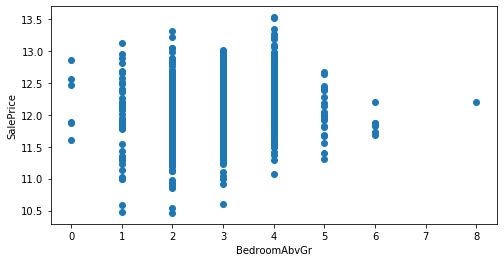

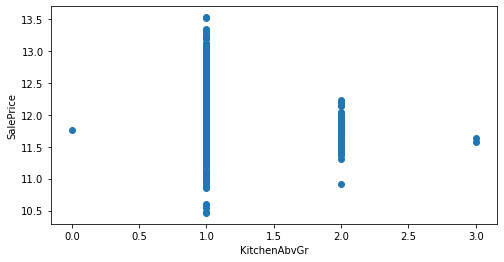

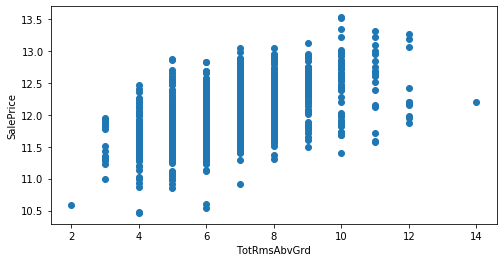

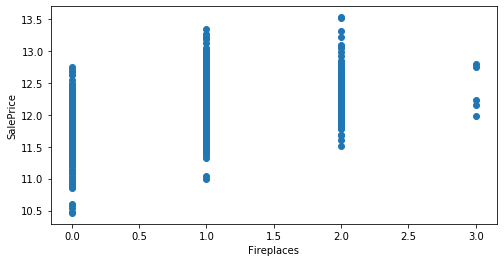

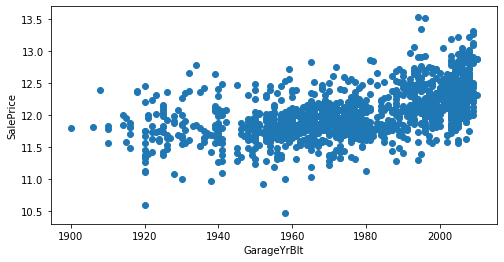

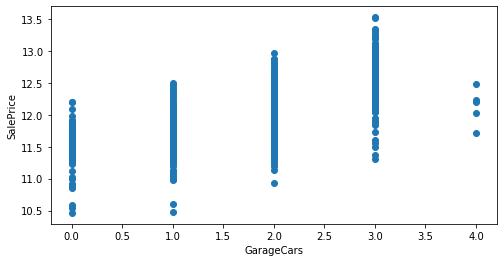

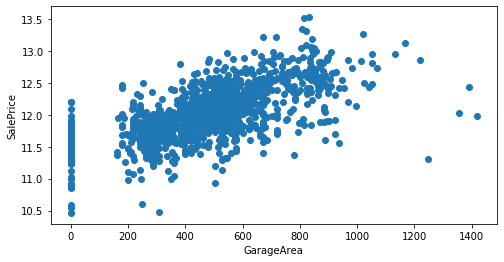

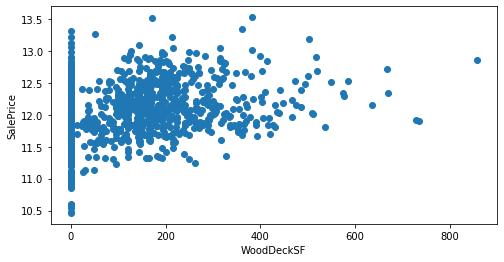

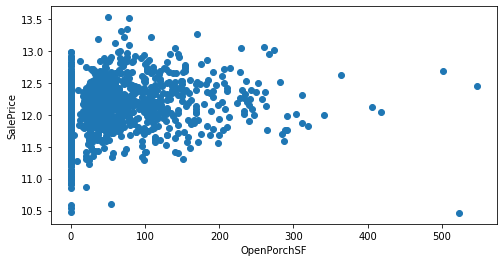

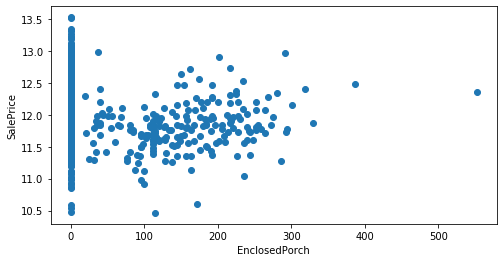

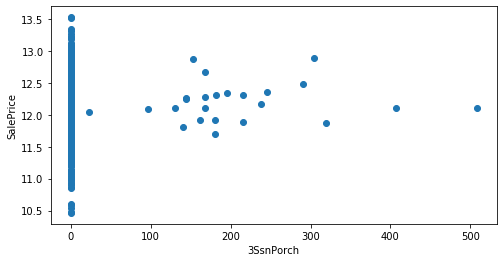

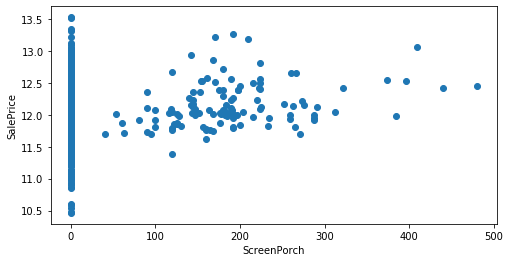

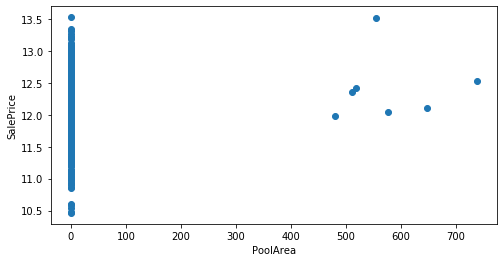

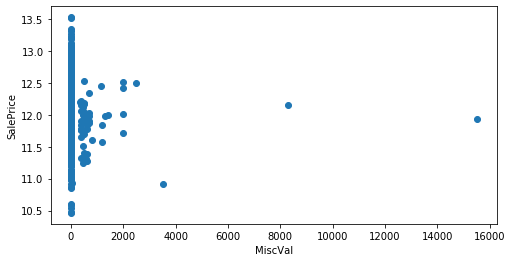

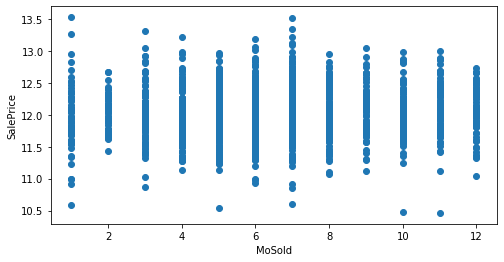

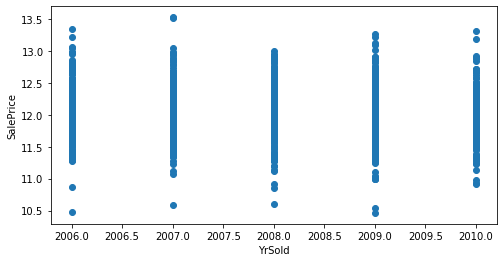

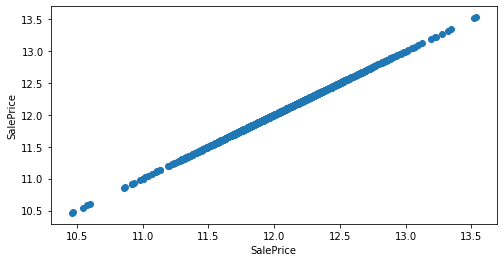

In [11]:
for i in datacol:
    plt.figure(figsize=(8,4))
    plt.scatter(dataset[i],dataset['SalePrice'])
    plt.xlabel(i)
    plt.ylabel('SalePrice')
    
    

In [12]:
corr = dataset.corr()
corr_data = abs(corr['SalePrice'])
corr_data

MSSubClass       0.073959
LotFrontage      0.355879
LotArea          0.257320
OverallQual      0.817185
OverallCond      0.036868
YearBuilt        0.586570
YearRemodAdd     0.565608
MasVnrArea       0.430809
BsmtFinSF1       0.372023
BsmtFinSF2       0.004832
BsmtUnfSF        0.221985
TotalBsmtSF      0.612134
1stFlrSF         0.596981
2ndFlrSF         0.319300
LowQualFinSF     0.037963
GrLivArea        0.700927
BsmtFullBath     0.236224
BsmtHalfBath     0.005149
FullBath         0.594771
HalfBath         0.313982
BedroomAbvGr     0.209043
KitchenAbvGr     0.147548
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
GarageYrBlt      0.541073
GarageCars       0.680625
GarageArea       0.650888
WoodDeckSF       0.334135
OpenPorchSF      0.321053
EnclosedPorch    0.149050
3SsnPorch        0.054900
ScreenPorch      0.121208
PoolArea         0.069798
MiscVal          0.020021
MoSold           0.057330
YrSold           0.037263
SalePrice        1.000000
Name: SalePrice, dtype: float64

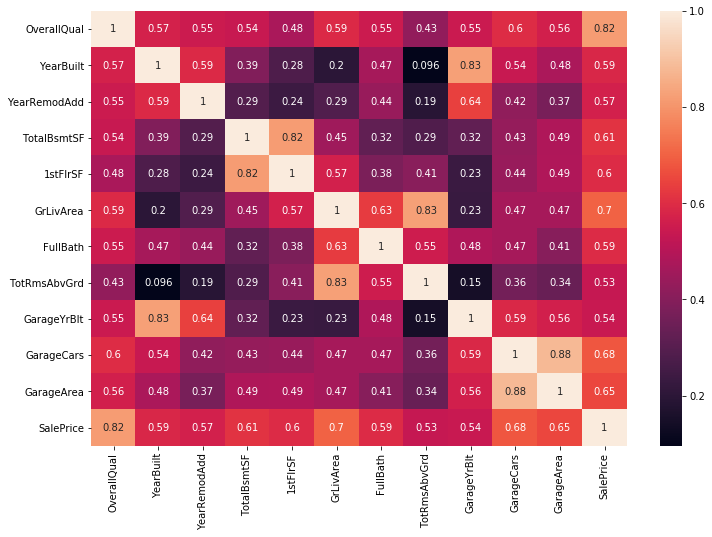

In [13]:
feature = corr_data.index[corr_data>0.5]
feature1 = corr_data.index[corr_data<=0.5]
plt.figure(figsize = (12,8) )
sns.heatmap(dataset[feature].corr(),annot=True)
plt.show()

In [14]:
feature1 = list(feature1)
dataset = dataset.drop(feature1,axis=1).copy()


# Handling missing data in numeric cols:

In [15]:
dataset[feature].isnull().sum()

OverallQual      0
YearBuilt        0
YearRemodAdd     0
TotalBsmtSF      0
1stFlrSF         0
GrLivArea        0
FullBath         0
TotRmsAbvGrd     0
GarageYrBlt     81
GarageCars       0
GarageArea       0
SalePrice        0
dtype: int64

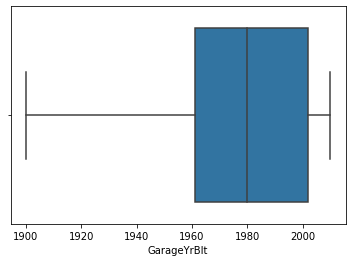

In [16]:
sns.boxplot(dataset['GarageYrBlt'])

In [17]:
#dataset[feature]

In [18]:
dataset['GarageYrBlt'].fillna(dataset['GarageYrBlt'].mean(),inplace=True)


In [19]:
dataset[feature].isnull().sum()

OverallQual     0
YearBuilt       0
YearRemodAdd    0
TotalBsmtSF     0
1stFlrSF        0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
GarageYrBlt     0
GarageCars      0
GarageArea      0
SalePrice       0
dtype: int64

# To remove the zeros value in text

In [20]:
feattxcls = dataset.select_dtypes(include='object').columns
feattxcls

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [21]:
dataset[feattxcls].isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [22]:
df = dataset[feattxcls].isnull().sum()[dataset[feattxcls].isnull().sum()>1000].index
df = list(df)
df

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [23]:
dataset = dataset.drop(df,axis=1).copy()

In [24]:
a1 = dataset.isnull().sum().index[dataset.isnull().sum()>0]


In [25]:
for i in a1:
    b1 = dataset[i].value_counts().index.tolist()
    dataset[i] = dataset.fillna(b1[0])
    
#for i in a1.index:
#    b1 = dataset[i].value_counts().index.tolist()
#    dataset[i] = dataset[i].fillna(b1[0])

In [26]:
#df2 = dataset.isnull().sum()[dataset.isnull().sum()>0].index
dataset.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
GrLivArea        0
FullBath         0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64

In [27]:
cols = dataset.select_dtypes(include='object').columns
dataset = pd.get_dummies(dataset,columns=cols)

In [28]:
dataset.shape

(1460, 254)

In [30]:
dataset.to_csv('C:\\Users\\Pc\\Downloads\\output2_data.csv')


# Model Fitting:

Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
X = dataset.drop("SalePrice", axis = 1).values
Y = dataset["SalePrice"].values


In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

In [34]:
model= LinearRegression()
model = model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8957315135934258

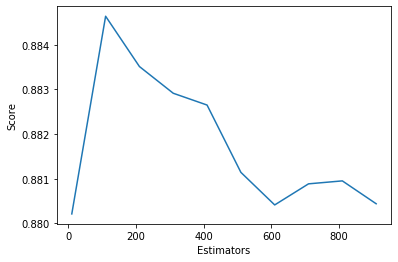

In [35]:
from sklearn.ensemble import RandomForestRegressor
estimators = range(10,1000,100)
score = []
for n in estimators:
    model1 = RandomForestRegressor(n_estimators=n,random_state=42)
    model1 = model1.fit(x_train,y_train)
    score.append(model1.score(x_test,y_test))
plt.plot(estimators,score)
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.show()


In [36]:
model1 = RandomForestRegressor(n_estimators=190,random_state=42)
model1 = model1.fit(x_train,y_train)

In [37]:
model1.score(x_test,y_test)

0.8833285232860008

In [52]:
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor(max_depth=20)
model2 = model2.fit(x_train,y_train)

In [53]:
model2.score(x_test,y_test)

0.7686140343212751

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sac = StandardScaler()
x_train = sac.fit_transform(X_train)
x_test = sac.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)

In [ ]:
model.score(x_test,y_test)


In [ ]:
y_pred = model.predict(x_test)

In [ ]:
df11 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df11
df11.corr()

In [ ]:
import numpy as np
import pandas as pd
Dataset= pd.read_csv('C:\\Users\\dipali.sonal\\Downloads\\K-Means-Clustering-master\\K-Means-Clustering-master\\Mall_Customers.csv')

In [ ]:
X = dataset.iloc[:,[3,4]].values

In [ ]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#x_grid, y_grid = np.meshgrid(np.arange(x_min, x_max, step = 0.01),np.arange(y_min, y_max, step = 0.01))
#x_grid,y_grid = np.meshgrid(np.arange(-1,6111,0.01),np.arange(333,4693,0.01))                  
#Z = classifier.predict(np.c_[x_grid.ravel(), y_grid.ravel()])

In [ ]:
print(x_min)
print(x_max)
print(y_min)
print(y_max)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcc=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state=0)
    kmeans.fit(X)
    wcc.append(kmeans.inertia_)
print(wcc) 

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcc)
plt.xlabel('No of cluster')
plt.ylabel('wcc')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5,init = 'k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(X)


In [ ]:
y_kmeans

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans